#Advance Machine Learning Course-2

##Week-1

###Neural Networks

**Neuron (Artificial Neuron)**
* A basic unit of a neural network, inspired by biological neurons.

* Takes input(s), applies a weight, adds a bias, and passes through an activation function to produce an output.

**Mathematical representation:**\
y = f(W.X + b)

**Neural Networks**
* A system of interconnected neurons designed to recognize patterns.

**Consists of multiple layers:**

* Input Layer – Receives raw data

* Hidden Layer(s) – Processes data using weights and activation functions

* Output Layer – Produces the final result


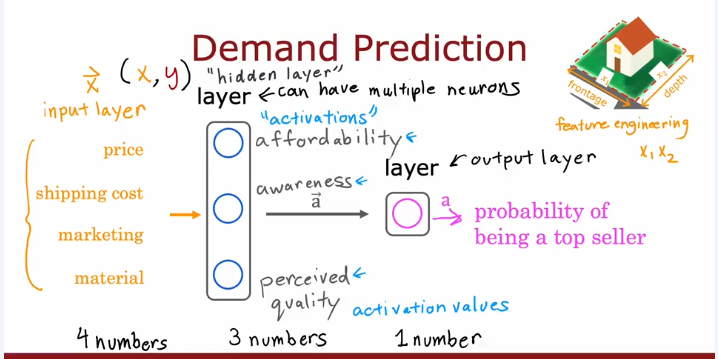

Here, X is input vector, 1st 'a' is the output of first hidden layer, 2nd 'a' is the output of 2nd hidden layer, finally we get output from output layer.

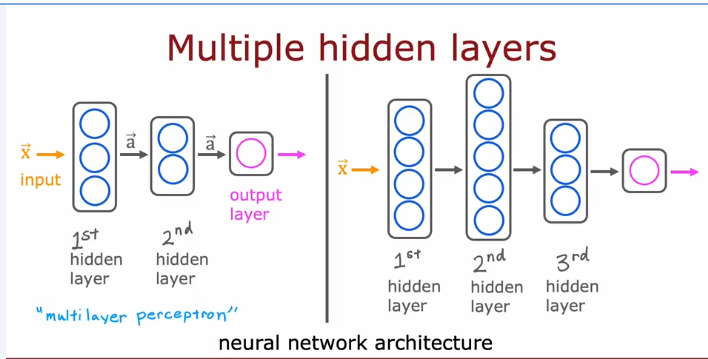

**Face Detection**
* 1st layer It tries to findout different line or edges on pictures
* next layer it tries to find eyes, nose leaps and so on.
* in the next layer, it may try to find faces from images and so on
* finally it predicts the probability of being a person.

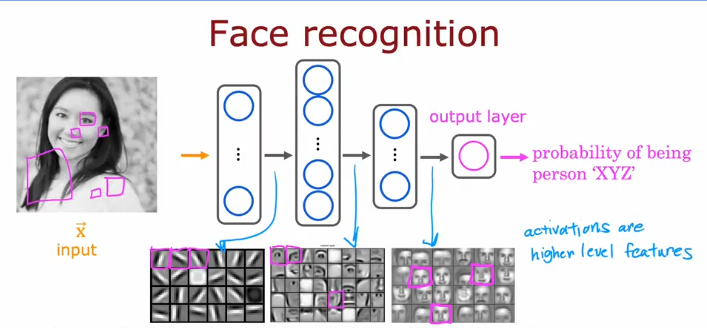

###Building Neural Networl

Here superscript means Layer number. \
subscript means neuron number. \
each neuron of 1st layer has one vector 'w' of sthe size of input vector 'X', also has a bias 'b'.

a[1] is the output vector of 1st layer's neurons.\
then output of 1st layer a[1] pass through next layer, in this case output layer.


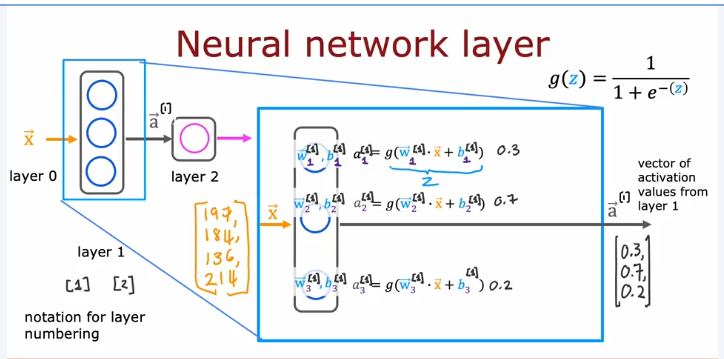

Similarly, we get the output of 2nd layer, that means output layes.

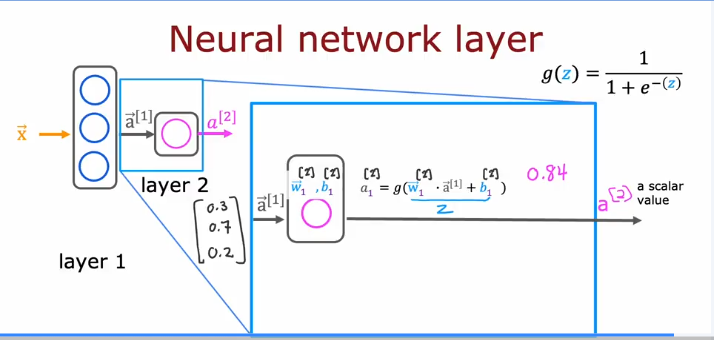

using output probability of final layer a[2], we can predict y^. in this case, \
if a[2] > 0.5, y^ = 1 \
and if a[2] < 0.5, y^ = 0

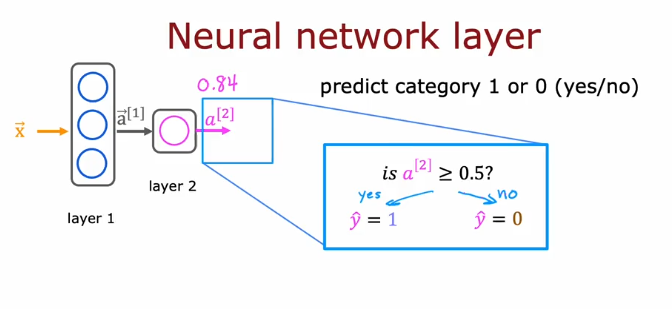

Complex neural network having multiple hidden layers.

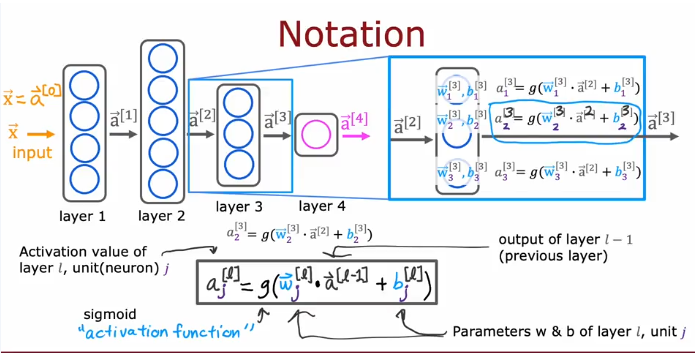

###Neura network using tensorflow

Here are the basic steps for tensorflow.

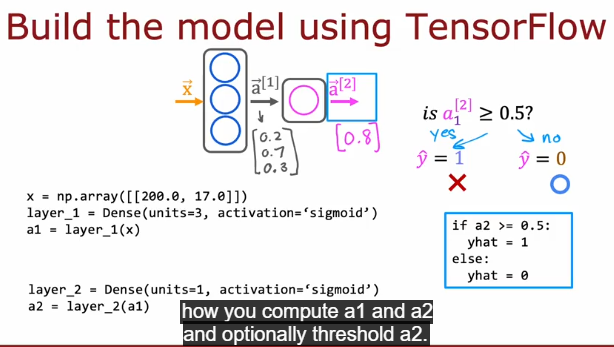

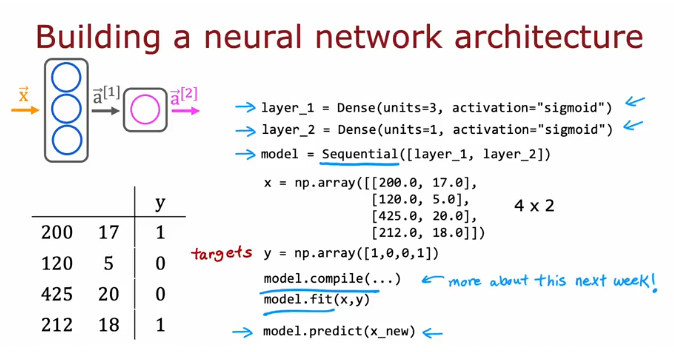

We can also write code for Sequential like bellow.

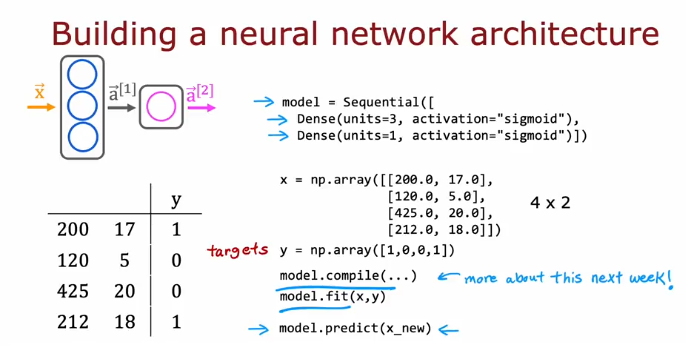

###Forward Propagation in NumPy

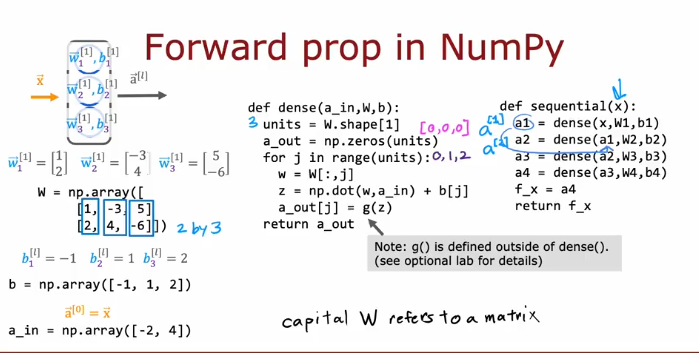

###Vectorization

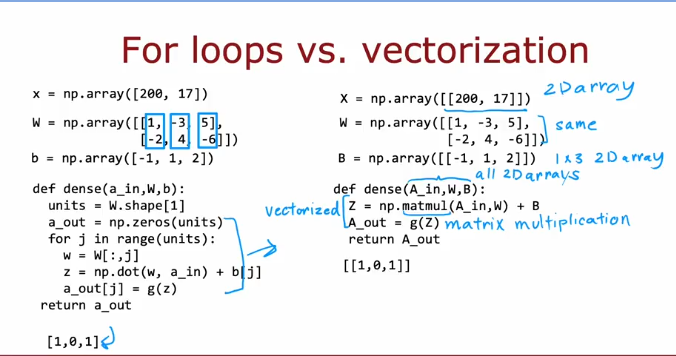

###Implementation of Forward Propagation

In [9]:
import numpy as np
X = np.array([[0.52, 0.517], [0.5, 0.25]]) #number of features = 2 and number of sample = 2

#One layer and 3 neurons
#number of rows are 2 beacuse number of features = 2
W = np.array([[1,-0.3, 0.5],
              [-2, 0.4, -0.6]])
#3 bias for 3 neurons
B = np.array([[-1, 1, 2]])

def dense(A_in, W, B):
  Z = np.linalg.matmul(A_in, W) + B
  A_out = 1/(1+np.exp(Z))
  return A_out

print(dense(X, W, B))

[[0.81965325 0.25907151 0.12457517]
 [0.73105858 0.27888482 0.10909682]]


In [ ]:
W.shape

(2, 2)

##Week-2

###Tensorflow implementation

here, we have used 3 layers, 25 units for 1st layer, 15 units for 2nd layer and a single unit layer for output. \
we used BinaryCrossentropy Loss function and used 100 epochs

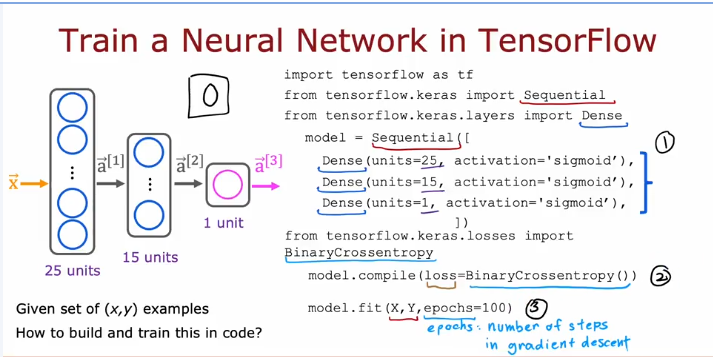

Basics Steps for model training

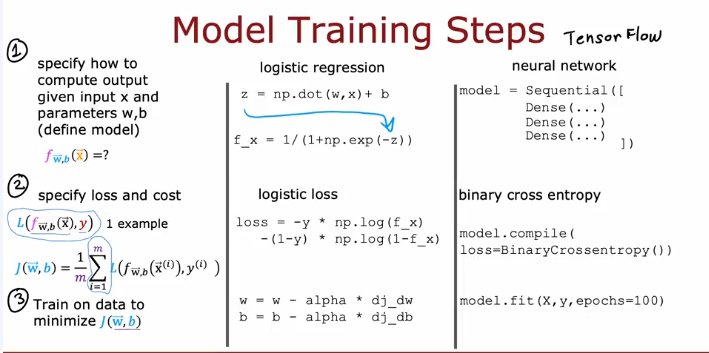

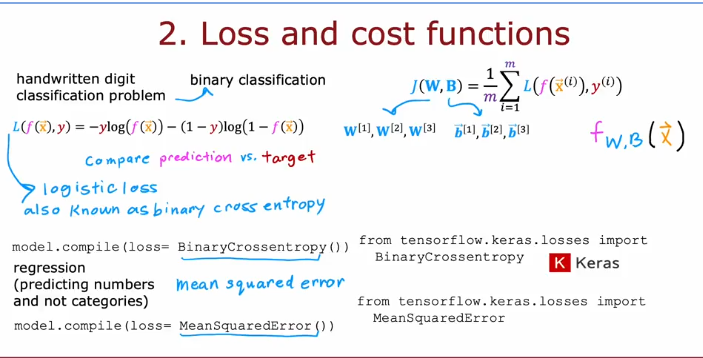

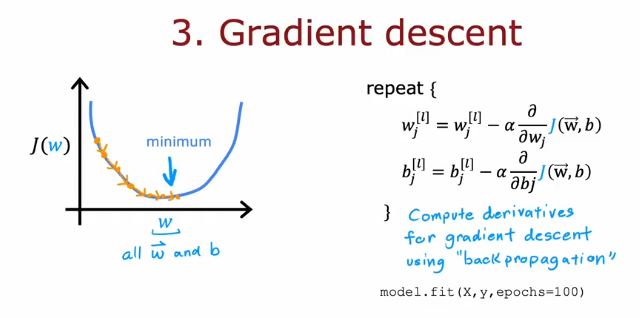

###Different Activation functions

**Linear Activation Function**

* Formula: f(x) = x

* Output: Same as input (no transformation).

* Use Case: Used in regression problems.

* Limitation: Cannot introduce non-linearity, making deep networks ineffective.

**Sigmoid Activation Function**

* Formula: f(x)= 1/(1+exp(-x))
* Output: Ranges between (0,1).
* Use Case: Binary classification problems.
* Limitation: Causes vanishing gradient problem, slow convergence.

**ReLU (Rectified Linear Unit)**

* Formula: f(x) = max(0,x)

* Output: If x >= 0 then f(x) = x, else f(x) = 0

* Use Case: Most commonly used in deep networks due to faster training.

* Limitation: Can suffer from "dying ReLU" where neurons output zero always.

**Softmax Activation Function**

* Formula: .......
* Output: Probabilities (sum to 1).
* Use Case: Multi-class classification.
* Limitation: Computationally expensive compared to ReLU.

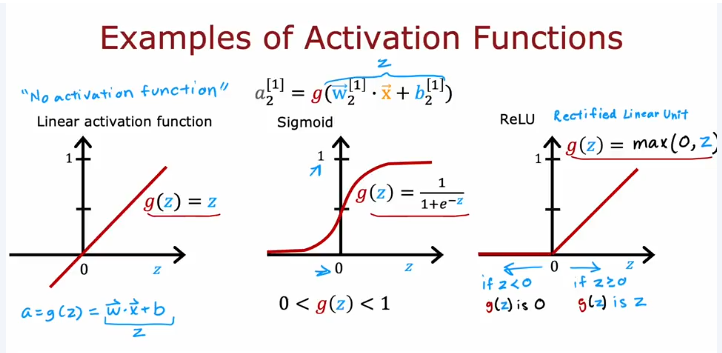

###Choosing activation for Output layer

* when output is 0 or 1, use sigmoid like binary classification
* use Linear activation for regression, whenr +/- values can be as output, temperature prediction
* use ReLU for regression problem, where, output is non negative number, like house price prediction, as price can't be negative

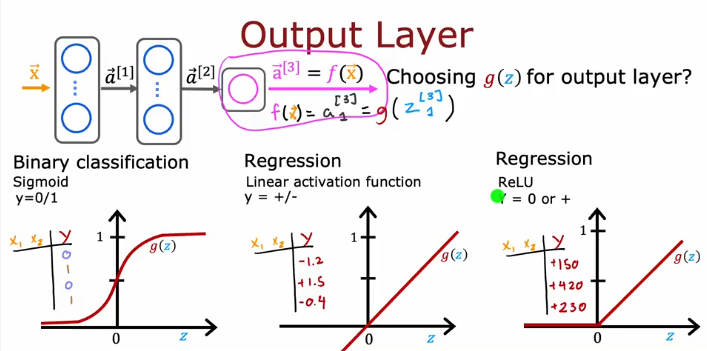

###Choosing Activation for Hidden layer

ReLU is better for main two reasons:
* Its is faster then sigmoid as it doesn't need any computation, but sigmoid need division, also exponent.
* another reason is, sigmoid is **flat at two sides**, but ReLu is flat at only one side, as we know **gradient decent become slow at flat** region

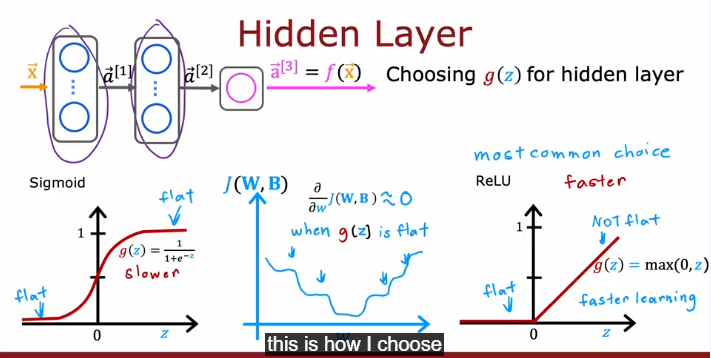

Here is summary of choosing activation function as well as tensorflow implementation

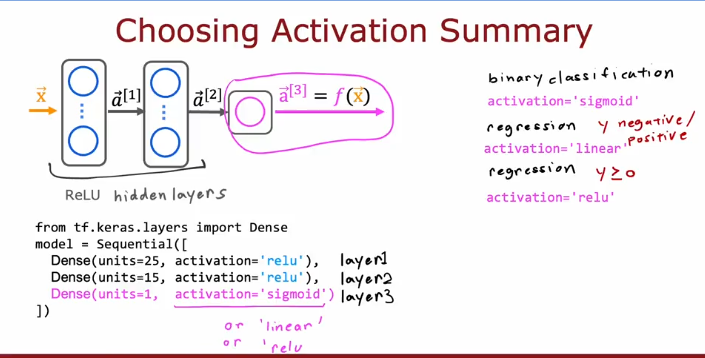

###Why activation function is reuired

If we use no activation function or Linear activation at each layer, it will be just like linear regression model.

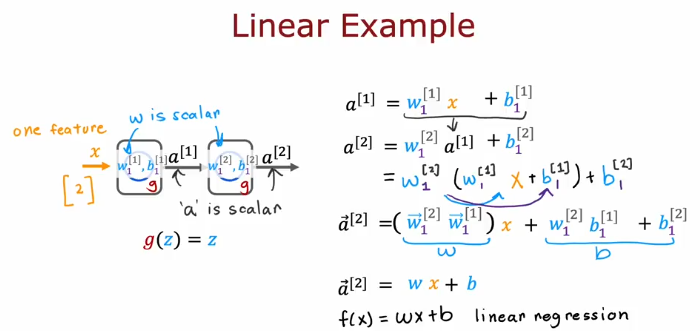

If we use Linear activstion function to all hidden layers, and sigmoid to output layer, it will just look like logistic regression model.

So, use ReLU activation to hidden layers

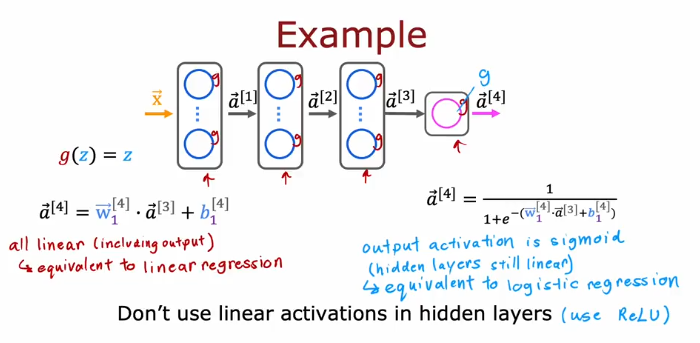

##Week-3

##Week-4

#Extra Algorithms

##Decision Tree


In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
# Function to import the dataset
def importdata():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-' +
        'databases/balance-scale/balance-scale.data',
        sep=',', header=None)

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())

    return balance_data


In [ ]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test


In [ ]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))


In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


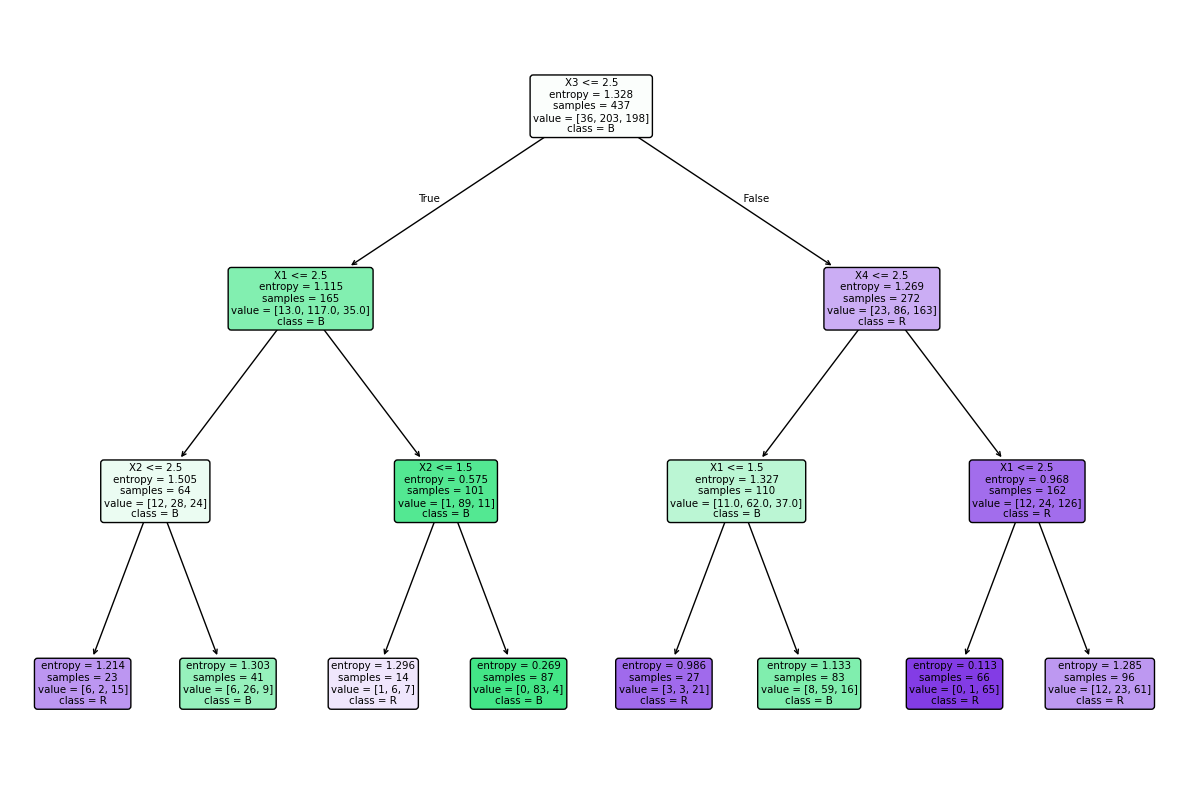

In [ ]:
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

In [ ]:
y_pred = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred)

Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
